We're finally ready to start looking at some data! Most files off the scanner come out as DICOM format files. DICOM stands for Digital Imaging and Communications in Medicine. The DICOM standard defines not just the file format, but also storage, transmission, retrieval, printing, and display of medical images.

DICOM files store information in elements. Each element includes a tag (a pair of hexadecimal values) , a value representation, and a value. For example, element (0008, 1030) is the Study Description and the value representation is LO (long string). A "study" corresponds to a scanning session. On our scanner, the study description includes the  Region^Protocol^Exam information from Dot Cockpit. We've set up the protocols so that Region = pirg, Protocol = PI, and Exam = protocol. This information is then used by the dicom receiver on talapas to sort dicom files into their correct directories.

In [1]:
dcmdir = '/projects/lcni/dcm'

In [2]:
import os
os.listdir(dcmdir)

['hulacon',
 'adapt_lab',
 'kuhl_lab',
 'giuliani_lab',
 'mayrlab',
 'csnl',
 'lcni',
 'temporary',
 'snaplab',
 'dsnlab',
 'bamlab',
 'storescu.cfg',
 'TalapasClass',
 'sanlab']

You won't be able to view files outside your own pirg.

In [3]:
os.listdir(os.path.join(dcmdir, 'TalapasClass'))

['Smith']

In [4]:
os.path.join(dcmdir, 'TalapasClass', 'Smith')

'/projects/lcni/dcm/TalapasClass/Smith'

In [5]:
classdir = os.path.join(dcmdir, 'TalapasClass', 'Smith', 'TC')

In [6]:
os.listdir(classdir)

['TC002_20180916_090647', 'TC001_20180620_110428']

Each scan session will be in a directory with the name subjectname_studydate_studytime. Inside each folder will be another folder for each dicom series. Some sequences produce one series, some produce multiple series.

In [7]:
!tree {classdir} -d

/projects/lcni/dcm/TalapasClass/Smith/TC
|-- TC001_20180620_110428
|   |-- Series_10_bold_DIFTIM_1.7mm
|   |-- Series_11_bold_DIFTIM_1.7mm
|   |-- Series_1_AAHead_Scout_32ch-head-coil
|   |-- Series_2_AAHead_Scout_32ch-head-coil_MPR_sag
|   |-- Series_3_AAHead_Scout_32ch-head-coil_MPR_cor
|   |-- Series_4_AAHead_Scout_32ch-head-coil_MPR_tra
|   |-- Series_5_mprage_p2
|   |-- Series_6_bold_DIFTIM_1.7mm
|   |-- Series_7_bold_DIFTIM_1.7mm
|   |-- Series_8_se_epi_1.7mm_ap
|   `-- Series_9_se_epi_1.7mm_pa
`-- TC002_20180916_090647
    |-- Series_1_localizer
    |-- Series_2_mprage_p2
    `-- Series_3_SVC_1_bold_mb3_g2_2mm_te25

16 directories


Yes, I stole these from other real studies, but don't worry, this is phantom data.

The dicom files can have any name really but ours are usually something like this

In [8]:
ls /projects/lcni/dcm/TalapasClass/Smith/TC001_20180620_110428/Series_2_AAHead_Scout_32ch-head-coil_MPR_sag/

ls: cannot access /projects/lcni/dcm/TalapasClass/Smith/TC001_20180620_110428/Series_2_AAHead_Scout_32ch-head-coil_MPR_sag/: No such file or directory


You can see a modality and a date in there but I wouldn't waste time trying to parse that. Better to go into the dicom files and get the real info.

In [9]:
# We can grab a random dicom file with glob
import glob
filename = glob.glob(os.path.join(classdir, 'TC001*', 'Series_10*', '*'))[0]

In [10]:
filename

'/projects/lcni/dcm/TalapasClass/Smith/TC/TC001_20180620_110428/Series_10_bold_DIFTIM_1.7mm/MR.1.3.12.2.1107.5.2.19.45348.2018062011400133617172731.dcm'

In [11]:
import pydicom

In [12]:
dcmfile = pydicom.dcmread(filename)

In [25]:
dcmfile

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'MB', 'ND', 'NORM', 'MOSAIC']
(0008, 0012) Instance Creation Date              DA: '20180620'
(0008, 0013) Instance Creation Time              TM: '114020.906000'
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.2.19.45348.2018062011400133617172731
(0008, 0020) Study Date                          DA: '20180620'
(0008, 0021) Series Date                         DA: '20180620'
(0008, 0022) Acquisition Date                    DA: '20180620'
(0008, 0023) Content Date                        DA: '20180620'
(0008, 0030) Study Time                          TM: '110428.532000'
(0008, 0031) Series Time                         TM: '113940.874000'
(0008, 0032) Acquisition Time                    TM: '113958.195000'
(0008, 0033) Content Time                        T

Things to notice about dicome files! First look at the tags. The first value of the pair identifies standard elements vs private elements: even numbered elements are defined by the dicom standard, and odd ones are private and added by the vendor or other software.

In [14]:
dcmfile['PatientName']

(0010, 0010) Patient's Name                      PN: 'TC001'

In [15]:
dcmfile.PatientName

'TC001'

In [16]:
dcmfile.StudyDescription

'TalapasClass^Smith^TC'

In [17]:
dcmfile.PatientAge

'012Y'

In [18]:
dcmfile.ProtocolName

'bold_DIFTIM_1.7mm'

In [19]:
type(dcmfile.PixelData)

bytes

In [20]:
type(dcmfile.pixel_array)

numpy.ndarray

In [21]:
pixeldata = dcmfile.pixel_array

In [22]:
import matplotlib.pyplot as plt

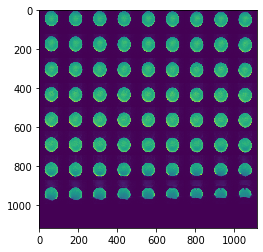

In [23]:
plt.imshow(pixeldata)

(-0.5, 1115.5, 1115.5, -0.5)

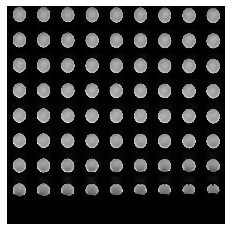

In [24]:
plt.imshow(pixeldata, cmap = 'gray')
plt.axis('off')